In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from analysis_toolkit import setup_latex, util, plots
from analysis_toolkit import definitions as defs

summary = pd.read_csv('summary.csv', dtype=defs.COLUMNS)
setup_latex()

In [2]:
class EffectComparison:
    
    FIGSIZE = (6.5, 3)
    
    def __init__(self):
    
        for score, info in self.SCORES.items():

            fig, ax = plt.subplots(1,1, figsize=self.FIGSIZE)
            plots.boxplots_effect(summary, fig, ax, score, methods=self.METHODS)

            ax.set_xlim(info['xlim'])
            ax.set_title(self.DESC + ' | ' + info['name'])
            ax.set_xlabel('Oracle Normalized ' + info['name'])
            fig.savefig('{}/effect_{}.pdf'.format(self.FOLDER, score), bbox_inches='tight')

In [3]:
class EffectPrior(EffectComparison):
    
    METHODS =  {
        "mfm_prior_high": r"poisson$(k + 2)$",
        "mfm_hybrid": r"poisson$(k)$",
        "mfm_prior_low": r"poisson$(k - 2)$",
    }

    SCORES =  {
        'segregation': {'name': 'Segregation', 'xlim': (0.95, 1.02)},
        'aggregation': {'name': 'Aggregation', 'xlim': (0.8, 1.02)},
        'nmi': {'name': 'NMI', 'xlim': (0.8, 1.02)},
        'rand': {'name': 'Rand Score', 'xlim': (0.8, 1.02)},
    }

    DESC = 'MFM Prior Misspecification'

    FOLDER = 'plots/p1_mfm_prior'


In [4]:
class EffectAlpha(EffectComparison):

    METHODS = {
        "dpm_small_alpha": r'$\alpha=0.1$',
        "dpm_hybrid": r'$\alpha=1$',
        "dpm_big_alpha": r'$\alpha=10$',
    }


    SCORES = {
        'segregation': {'name': 'Segregation', 'xlim': (0.97, 1.02)},
        'aggregation': {'name': 'Aggregation', 'xlim': (0.6, 1.02)},
        'nmi': {'name': 'NMI', 'xlim': (0.6, 1.02)},
        'rand': {'name': 'Rand Score', 'xlim': (0.6, 1)},
    }
    
    DESC = r'Effect of $\alpha$'
    
    FOLDER = 'plots/p1_alpha'
    

In [5]:
class EffectEmpiricalBayes(EffectComparison):

    METHODS = {
        "dpm_hybrid": "Base",
        "dpm_eb": "EB",
        "dpm_eb_gibbs": "EB + Gibbs"
    }

    SCORES = {
        'segregation': {'name': 'Segregation', 'xlim': (0.95, 1.02)},
        'aggregation': {'name': 'Aggregation', 'xlim': (0.8, 1.02)},
        'nmi': {'name': 'NMI', 'xlim': (0.8, 1.02)},
        'rand': {'name': 'Rand Score', 'xlim': (0.8, 1.02)},
    }
    
    DESC = 'Empirical Bayes'
    
    FOLDER = 'plots/p1_eb'

In [6]:
class EffectSplitMerge(EffectComparison):
    METHODS = {
        "mfm_sm": "SM",
        "mfm_hybrid_3": "(3, 1)",
        "mfm_hybrid": "(5, 1)",
        "mfm_hybrid_10": "(10, 1)",
        "mfm_gibbs": "Gibbs",
    }

    SCORES = {
        'segregation': {'name': 'Segregation', 'xlim': (0.9, 1.02)},
        'aggregation': {'name': 'Aggregation', 'xlim': (0.7, 1.02)},
        'nmi': {'name': 'NMI', 'xlim': (0.6, 1.02)},
        'rand': {'name': 'Rand Score', 'xlim': (0.5, 1.02)},
    }
    
    DESC = 'Hybrid Split Merge Sampler Proportions (MFM)'
    
    FOLDER = 'plots/p1_sm'
    
    FIGSIZE = (6.5, 5)
    

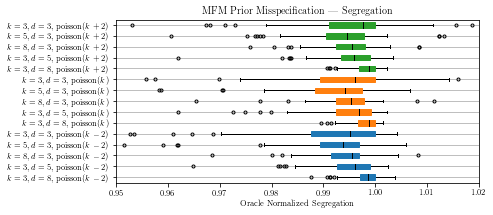

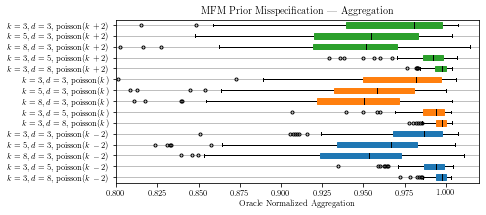

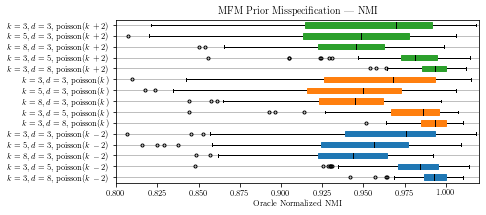

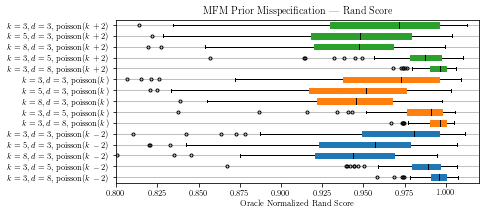

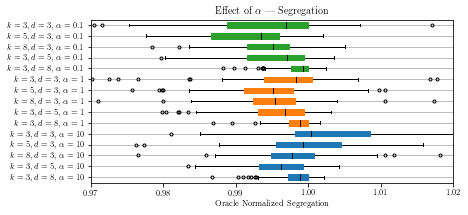

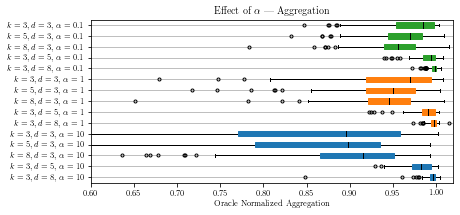

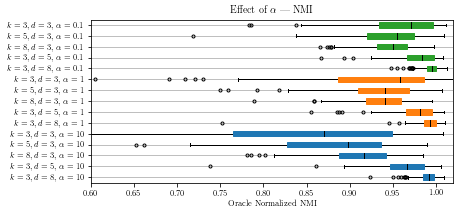

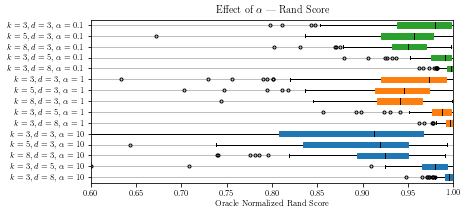

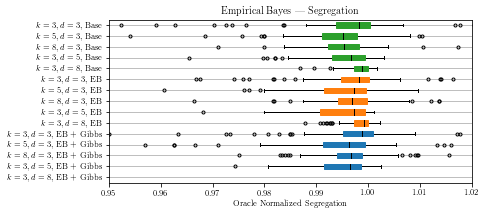

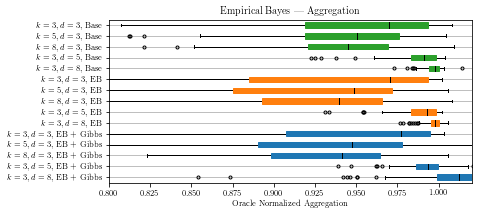

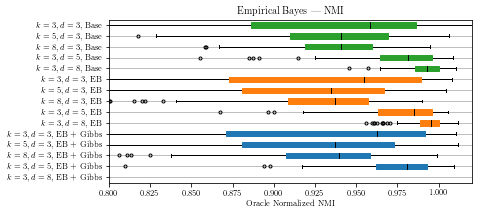

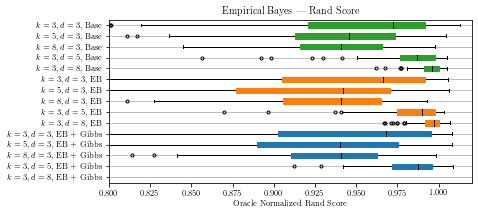

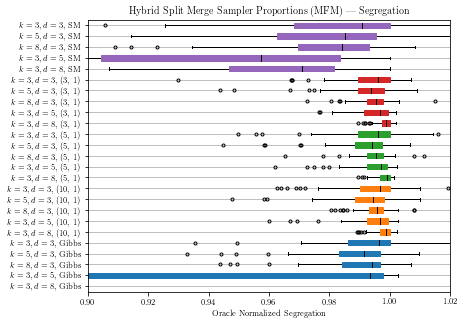

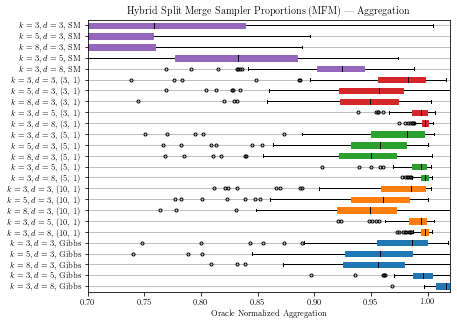

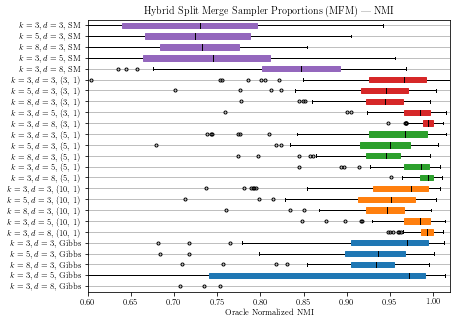

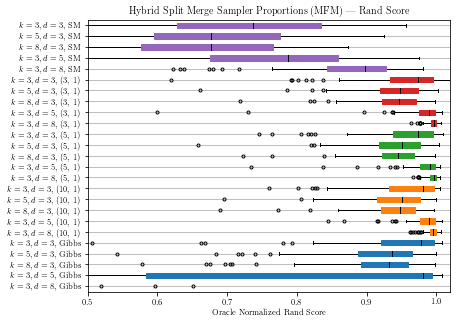

In [7]:
EffectPrior()
EffectAlpha()
EffectEmpiricalBayes()
EffectSplitMerge()